### First, let's import data, set up pandas display options and data preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# # set up pd option, uncomment the following lines for full display of data
# pd.set_option('display.max_columns', 40)
# pd.set_option('display.max_rows', 90)

# read data
df0 = pd.read_csv('data0.txt', sep="\s*")
df1 = pd.read_csv('data1.txt', sep="\s*")
df_t0 = pd.read_csv('tdata0.txt', sep="\s*")
df_t1 = pd.read_csv('tdata1.txt', sep="\s*")

# data preprocessing
df = pd.concat([df0,df1])
df_t = pd.concat([df_t0,df_t1])

df = df.reset_index(level=[0,1])
df_t = df_t.reset_index(level=[0,1])

df['date'] = df['level_1']+df['level_0'].str.lower()
df_t['date'] = df_t['level_1']+df_t['level_0'].str.lower()

df = df['date']
list_w_kl = list(df)

df_w_kawhi = df_t[df_t["date"].isin(list_w_kl)] # game data with kawhi played
df_wo_kawhi = df_t[~df_t["date"].isin(list_w_kl)] # game data without kawhi played

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
c:\program files\python36\lib\site-packages\pandas\io\parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
c:\program files\python36\lib\site-packages\pandas\io\parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.pa

### Let's have a look at the raw data
Glossary:
GP Games Played MIN Minutes Played FGM Field Goals Made FGA Field Goals Attempted FG% Field Goal Percentage 3PM 3 Point Field Goals Made 3PA 3 Point Field Goals Attempted 3P% 3 Point Field Goals Percentage FTM Free Throws Made FTA Free Throws Attempted FT% Free Throw Percentage OREB Offensive Rebounds DREB Defensive Rebounds REB Rebounds AST Assists TOV Turnovers STL Steals BLK Blocks

![kl_data](./pic/kl_data.jpg)
picture referenced from https://stats.nba.com/

It is true that Kawhi only played 60 games for Raptors during 2018-19 season no matter which data you are referring from, the data from website or the data I processed

In [2]:
df_w_kawhi

level_0 level_1 MATCHUP W/L  MIN  PTS  FGM  FGA   FG%  3PM  \
2019 - TOR @       APR     09,     MIN   W  240  120   46   88  52.3   16   
           vs.     APR     07,     MIA   W  265  117   39   87  44.8   16   
           @       APR     05,     CHA   L  240  111   43   80  53.8    9   
           @       APR     03,     BKN   W  240  115   44  105  41.9   15   
           vs.     APR     01,     ORL   W  240  121   42   84  50.0   19   
           vs.     MAR     26,     CHI   W  240  112   42   86  48.8   12   
           vs.     MAR     24,     CHA   L  240  114   45   77  58.4   11   
           vs.     MAR     22,     OKC   L  240  109   39   78  50.0   13   
           @       MAR     20,     OKC   W  265  123   45   87  51.7   14   
           @       MAR     17,     DET   L  240  107   39   82  47.6   18   
           vs.     MAR     14,     LAL   W  240  111   36   91  39.6   16   
           @       MAR     11,     CLE   L  240  101   40   84  47.6   11   
           @       MAR     08,     NOP   W  240  127   53   99  53.5   13   
           vs.     MAR     05,     HOU   L  240   95   37   89  41.6    9   
           vs.     MAR     01,     POR   W  240  119   45   81  55.6   10   
           vs.     FEB     26,     BOS   W  240  118   46   94  48.9   17   
           vs.     FEB     22,     SAS   W  240  120   40   94  42.6   14   
           vs.     FEB     11,     BKN   W  240  127   50   92  54.3    9   
           @       FEB     09,     NYK   W  240  104   33   86  38.4   14   
           @       FEB     05,     PHI   W  240  119   41   89  46.1   11   
           vs.     FEB     03,     LAC   W  240  121   43   94  45.7    9   
           vs.     JAN     31,     MIL   L  240   92   37   93  39.8    7   
           @       JAN     27,     DAL   W  240  123   37   83  44.6   17   
           @       JAN     25,     HOU   L  240  119   44   91  48.4   14   
           @       JAN     16,     BOS   L  240  108   41   92  44.6    7   
           @       JAN     13,     WAS   W  290  140   49  104  47.1   13   
           vs.     JAN     11,     BKN   W  240  122   48  105  45.7   11   
           vs.     JAN     08,     ATL   W  240  104   37   80  46.3   10   
           @       JAN     05,     MIL   W  240  123   42   82  51.2   14   
           @       JAN     03,     SAS   L  240  107   39   87  44.8    6   
           vs.     JAN     01,     UTA   W  240  122   45   82  54.9    7   
2018 - TOR vs.     DEC     30,     CHI   W  240   95   34   92  37.0    9   
           @       DEC     28,     ORL   L  240   87   28   95  29.5   12   
           @       DEC     26,     MIA   W  240  106   37   79  46.8   13   
           vs.     DEC     21,     CLE   W  240  126   48   91  52.7    9   
           vs.     DEC     19,     IND   W  240   99   38   93  40.9    7   
           @       DEC     16,     DEN   L  240   86   35   88  39.8    7   
           @       DEC     14,     POR   L  240  122   43   78  55.1   18   
           vs.     DEC     09,     MIL   L  240   99   39   94  41.5   15   
           @       DEC     07,     BKN   L  265  105   35   89  39.3   11   
           vs.     DEC     05,     PHI   W  240  113   43  100  43.0    8   
           vs.     DEC     03,     DEN   L  240  103   40   87  46.0   11   
           @       DEC     01,     CLE   W  240  106   39   80  48.8    7   
           vs.     NOV     29,     GSW   W  265  131   47   90  52.2   15   
           @       NOV     27,     MEM   W  240  122   42   69  60.9   18   
           vs.     NOV     25,     MIA   W  240  125   47   90  52.2   11   
           vs.     NOV     23,     WAS   W  240  125   46   93  49.5   17   
           @       NOV     20,     ORL   W  240   93   39   87  44.8    9   
           @       NOV     16,     BOS   L  265  116   42   97  43.3    8   
           vs.     NOV     14,     DET   L  240  104   45   92  48.9    4   
           vs.     NOV     12,     NOP   L  240  110   39   97  40.2   13   
           

In [3]:
df_wo_kawhi

level_0 level_1 MATCHUP W/L  MIN  PTS  FGM  FGA   FG%  3PM  \
2019 - TOR @       MAR     30,     CHI   W  240  124   46   89  51.7   18   
           @       MAR     28,     NYK   W  240  117   40   89  44.9   20   
           vs.     MAR     18,     NYK   W  240  128   49   88  55.7   17   
           @       MAR     10,     MIA   W  240  125   42   74  56.8   21   
           @       MAR     03,     DET   L  265  107   37   96  38.5   14   
           vs.     FEB     24,     ORL   L  240   98   38   91  41.8   11   
           vs.     FEB     13,     WAS   W  240  129   44   92  47.8   16   
           @       FEB     07,     ATL   W  240  119   40   87  46.0   13   
           @       JAN     23,     IND   L  240  106   38   92  41.3   12   
           vs.     JAN     22,     SAC   W  240  120   40   91  44.0   16   
           vs.     JAN     19,     MEM   W  240  119   44   90  48.9   17   
           vs.     JAN     17,     PHX   W  240  111   43   86  50.0    7   
           vs.     JAN     06,     IND   W  240  121   44   85  51.8   17   
2018 - TOR @       DEC     22,     PHI   L  240  101   37   95  38.9   10   
           @       DEC     12,     GSW   W  240  113   44   91  48.4    9   
           @       DEC     11,     LAC   W  240  123   50   96  52.1   14   
           @       NOV     21,     ATL   W  240  124   48   90  53.3   11   
           @       NOV     17,     CHI   W  240  122   48   89  53.9   14   
           @       NOV     05,     UTA   W  240  124   49   86  57.0   13   
           @       NOV     04,     LAL   W  240  121   49   98  50.0   10   
           @       OCT     29,     MIL   L  240  109   39  103  37.9    9   
           @       OCT     20,     WAS   W  240  117   39   88  44.3   10   

                ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  PF    date  
2019 - TOR @    ...  77.8     6    41   47   35   10    4   11  15  30,mar  
           @    ...  77.3     6    38   44   32    8    6    8  28  28,mar  
           vs.  ...  59.1     5    45   50   36    5    6   14  22  18,mar  
           @    ...  76.9     6    38   44   32    8    8   19  23  10,mar  
           @    ...  79.2    18    32   50   22    8    3   15  28  03,mar  
           vs.  ...  78.6     6    36   42   30    6    2   13  20  24,feb  
           vs.  ...  83.3     9    43   52   32    8    8   14  27  13,feb  
           @    ...  78.8    12    38   50   29    6    2    8  23  07,feb  
           @    ...  78.3    10    35   45   28    2    5    9  22  23,jan  
           vs.  ...  68.6    12    34   46   25    7    5   16  21  22,jan  
           vs.  ...  87.5     8    29   37   31   19    8   10  17  19,jan  
           vs.  ...  72.0     9    30   39   27    8    8   14  27  17,jan  
           vs.  ...  94.1     8    33   41   30    9    4   15  21  06,jan  
2018 - TOR @    ...  89.5     8    33   41   17    5    2   15  24  22,dec  
           @    ...  84.2    10    38   48   27   12    3   11  17  12,dec  
           @    ...  75.0    10    33   43   34    8    6    7  22  11,dec  
           @    ...  73.9    14    41   55   33    6    1   17  21  21,nov  
           @    ...  92.3     8    46   54   31   14   10   23  24  17,nov  
           @    ...  92.9     7    36   43   21    9    3   14  28  05,nov  
           @    ...  92.9    13    36   49   32    9    4   12  24  04,nov  
           @    ...  78.6    15    36   51   25    9    7   10  19  29,oct  
           @    ...  80.6    14    38   52   21    5    5   17  29  20,oct  

[22 rows x 24 columns]

### Next, let's compare these two data as well as the data of all 82 Raptors' games from https://stats.nba.com/
![raptor_data](./pic/rap_stat.jpg)
picture referenced from https://stats.nba.com/

In [4]:
team_stat_df_w_Kawhi = pd.DataFrame(df_w_kawhi.mean()).rename(index=str, columns={0: "team_stat_w_Kawhi"})
team_stat_df_wo_Kawhi = pd.DataFrame(df_wo_kawhi.mean()).rename(index=str, columns={0: "team_stat_wo_Kawhi"})

In [5]:
team_stat = [48.5,114.4,42.2,89.1,47.4,12.4,33.8,36.6,17.7,22.0,80.4,9.6,35.6,45.2,25.4,8.3,5.3,14.0,21.0]
dictionary = dict(zip(list(team_stat_df_w_Kawhi.index), team_stat))
df_team_stat = pd.DataFrame.from_dict(dictionary,orient='index').rename(index=str, columns={0: "team_stat"})

In [6]:
res = pd.concat([df_team_stat,team_stat_df_w_Kawhi,team_stat_df_wo_Kawhi],axis=1, sort=False).drop(['MIN'])


In [7]:
res

,team_stat,team_stat_w_Kawhi,team_stat_wo_Kawhi
PTS,114.4,113.433333,117.181818
FGM,42.2,41.866667,43.090909
FGA,89.1,88.650000,90.272727
FG%,47.4,47.453333,47.954545
3PM,12.4,11.933333,13.590909
3PA,33.8,33.033333,35.863636
3P%,36.6,35.990000,37.959091
FTM,17.7,17.766667,17.409091
FTA,22.0,22.000000,21.954545
FT%,80.4,80.961667,80.518182


## Wait a minute! There must be something wrong.
For the first glance, it is impossible that the average of TOV from 82 games is higher than that from both of subgroups of games(team_stat_w_Kawhi;team_stat_wo_Kawhi). Let's go into the details, okey, it also happens for FG%, FTA, FT%. Hmm...Since my raw data is crawled from the same website, there must be something wrong, not sure with the team stats or the box scores. Anyway, I will calculte it myself.

In [8]:
df_team_stat_cal = pd.DataFrame(df_t.mean()).rename(index=str, columns={0: "team_stat_calculate"})
res_cal = pd.concat([df_team_stat_cal,team_stat_df_w_Kawhi,team_stat_df_wo_Kawhi],axis=1, sort=False).drop(['MIN'])

In [9]:
res_cal

,team_stat_calculate,team_stat_w_Kawhi,team_stat_wo_Kawhi
PTS,114.439024,113.433333,117.181818
FGM,42.195122,41.866667,43.090909
FGA,89.085366,88.650000,90.272727
FG%,47.587805,47.453333,47.954545
3PM,12.378049,11.933333,13.590909
3PA,33.792683,33.033333,35.863636
3P%,36.518293,35.990000,37.959091
FTM,17.670732,17.766667,17.409091
FTA,21.987805,22.000000,21.954545
FT%,80.842683,80.961667,80.518182


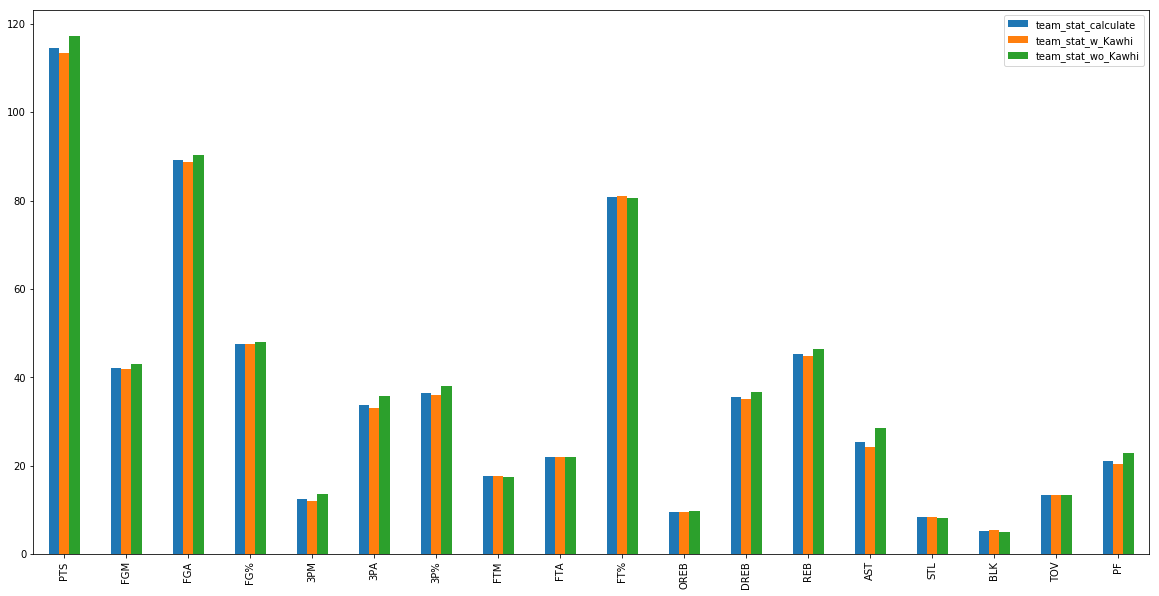

In [10]:
res_cal.plot.bar(figsize=(20,10));

### Let's compare the above data: team_stats---82games V.S.  games with Kawhi played V.S. games without Kawhi played
I have to say Kwahi is the best defender that I have ever seen. With him, the Raptors can get more steals and blocks. Since Kawhi is also the best free throw shooter with at least 1.5 attemps per game in Raptors, the team has better perfomce related to free throw with Kwahi. However, without Kwahi, Raptors seem to play even better with more points,rebounds and assists, higher FG% and 3P%, and less turnovers. You may doubt the results, so do I, although it is true. Okey, let's have a glance on the opposite teams without Kwahi played

In [11]:
df_wo_kawhi.groupby(['MATCHUP']).count().transpose().iloc[0]

MATCHUP
ATL    2
CHI    2
DET    1
GSW    1
IND    2
LAC    1
LAL    1
MEM    1
MIA    1
MIL    1
NYK    2
ORL    1
PHI    1
PHX    1
SAC    1
UTA    1
WAS    2
Name: level_0, dtype: int64

In the 22 games without Kwahi played, the opposite teams which can be called champion competitors are only Warriors and Bucks, of course, we can put Jazz and Pacers in if you want. Let's see how to make an appropriate comparsion. How about putting the win% in?

In [12]:
name_list = ["MIL","TOR","PHI","BOS","IND","BKN","ORL","DET","CHA","MIA","WAS","ATL","CHI","CLE","NYK","GSW","DEN","POR","HOU","UTA","OKC","SAS","LAC","SAC","LAL","MIN","MEM","NOP","DAL","PHX"]
win_p_list = [0.732,0.707,0.622,0.598,0.585,0.512,0.512,0.5,0.476,0.476,0.39,0.354,0.268,0.232,0.207,0.695,0.659,0.646,0.646,0.61,0.598,0.585,0.585,0.476,0.451,0.439,0.402,0.402,0.402,0.232]
d = {'name': name_list, 'win%': win_p_list}
df_win = pd.DataFrame(data=d)

In [13]:
df_win.sort_values("win%", ascending=False).transpose()

,0,1,15,16,18,17,2,19,20,3,...,25,28,27,26,10,11,12,13,29,14
name,MIL,TOR,GSW,DEN,HOU,POR,PHI,UTA,OKC,BOS,...,MIN,DAL,NOP,MEM,WAS,ATL,CHI,CLE,PHX,NYK
win%,0.732,0.707,0.695,0.659,0.646,0.646,0.622,0.61,0.598,0.598,...,0.439,0.402,0.402,0.402,0.39,0.354,0.268,0.232,0.232,0.207


In [14]:
df_w = pd.merge(df_t,df_win,how="left",left_on="MATCHUP",right_on="name")

In [15]:
df_w_kawhi0 = df_w[df_w["date"].isin(list_w_kl)] #game data with kwahi played including win%
df_wo_kawhi0 = df_w[~df_w["date"].isin(list_w_kl)] #game data without kwahi played including win%

In [16]:
df_w_kawhi0

,level_0,level_1,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,STL,BLK,TOV,PF,date,name,win%
0,APR,"09,",MIN,W,240,120,46,88,52.3,16,...,47,54,24,10,5,18,17,"09,apr",MIN,0.439
1,APR,"07,",MIA,W,265,117,39,87,44.8,16,...,43,47,26,7,5,11,17,"07,apr",MIA,0.476
2,APR,"05,",CHA,L,240,111,43,80,53.8,9,...,38,43,27,2,5,14,17,"05,apr",CHA,0.476
3,APR,"03,",BKN,W,240,115,44,105,41.9,15,...,35,52,29,9,1,7,16,"03,apr",BKN,0.512
4,APR,"01,",ORL,W,240,121,42,84,50.0,19,...,33,39,31,9,8,14,20,"01,apr",ORL,0.512
7,MAR,"26,",CHI,W,240,112,42,86,48.8,12,...,37,39,28,13,7,15,16,"26,mar",CHI,0.268
8,MAR,"24,",CHA,L,240,114,45,77,58.4,11,...,32,35,29,6,11,13,17,"24,mar",CHA,0.476
9,MAR,"22,",OKC,L,240,109,39,78,50.0,13,...,35,46,20,7,7,21,24,"22,mar",OKC,0.598
10,MAR,"20,",OKC,W,265,123,45,87,51.7,14,...,46,52,30,11,5,17,27,"20,mar",OKC,0.598
12,MAR,"17,",DET,L,240,107,39,82,47.6,18,...,31,38,25,2,2,12,22,"17,mar",DET,0.500


In [17]:
df_wo_kawhi0

,level_0,level_1,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,STL,BLK,TOV,PF,date,name,win%
5,MAR,"30,",CHI,W,240,124,46,89,51.7,18,...,41,47,35,10,4,11,15,"30,mar",CHI,0.268
6,MAR,"28,",NYK,W,240,117,40,89,44.9,20,...,38,44,32,8,6,8,28,"28,mar",NYK,0.207
11,MAR,"18,",NYK,W,240,128,49,88,55.7,17,...,45,50,36,5,6,14,22,"18,mar",NYK,0.207
15,MAR,"10,",MIA,W,240,125,42,74,56.8,21,...,38,44,32,8,8,19,23,"10,mar",MIA,0.476
18,MAR,"03,",DET,L,265,107,37,96,38.5,14,...,32,50,22,8,3,15,28,"03,mar",DET,0.500
21,FEB,"24,",ORL,L,240,98,38,91,41.8,11,...,36,42,30,6,2,13,20,"24,feb",ORL,0.512
23,FEB,"13,",WAS,W,240,129,44,92,47.8,16,...,43,52,32,8,8,14,27,"13,feb",WAS,0.390
26,FEB,"07,",ATL,W,240,119,40,87,46.0,13,...,38,50,29,6,2,8,23,"07,feb",ATL,0.354
32,JAN,"23,",IND,L,240,106,38,92,41.3,12,...,35,45,28,2,5,9,22,"23,jan",IND,0.585
33,JAN,"22,",SAC,W,240,120,40,91,44.0,16,...,34,46,25,7,5,16,21,"22,jan",SAC,0.476


In [18]:
df_w_kawhi0['win%'].describe()

count    60.000000
mean      0.494933
std       0.144031
min       0.207000
25%       0.402000
50%       0.512000
75%       0.598000
max       0.732000
Name: win%, dtype: float64

In [19]:
df_wo_kawhi0['win%'].describe()

count    22.000000
mean      0.450045
std       0.156891
min       0.207000
25%       0.354000
50%       0.463500
75%       0.585000
max       0.732000
Name: win%, dtype: float64

As we can see, the win% mean of the opposite teams without Kwahi played is 0.45. Let's filter out the teams with win% higher than 0.62 from the opposite teams with Kwahi played in order to make the data comparable to that without Kawhi played. Why is 0.62? Just give a shot to make the mean approach the target 0.45.

In [20]:
df_w_kawhi0[df_w_kawhi0['win%']<0.62]['win%'].describe()

count    47.000000
mean      0.447596
std       0.124799
min       0.207000
25%       0.396000
50%       0.476000
75%       0.512000
max       0.610000
Name: win%, dtype: float64

In [21]:
df_w_kawhi_lowR = df_w_kawhi0[df_w_kawhi0['win%']<0.62]

In [22]:
# team_stat with kawhi played and where the teams are with a lower winning rate(<0.62)
team_stat_df_w_kawhi_lowR = pd.DataFrame(df_w_kawhi_lowR.mean()).rename(index=str, columns={0: "team_stat_w_Kawhi_lowR"}).drop("win%")

In [24]:
res_revised = pd.concat([team_stat_df_w_kawhi_lowR, team_stat_df_wo_Kawhi],axis=1, sort=False).drop(['MIN'])

In [25]:
res_revised

,team_stat_w_Kawhi_lowR,team_stat_wo_Kawhi
PTS,113.957447,117.181818
FGM,41.957447,43.090909
FGA,88.617021,90.272727
FG%,47.570213,47.954545
3PM,12.042553,13.590909
3PA,33.021277,35.863636
3P%,36.240426,37.959091
FTM,18.000000,17.409091
FTA,22.574468,21.954545
FT%,79.825532,80.518182


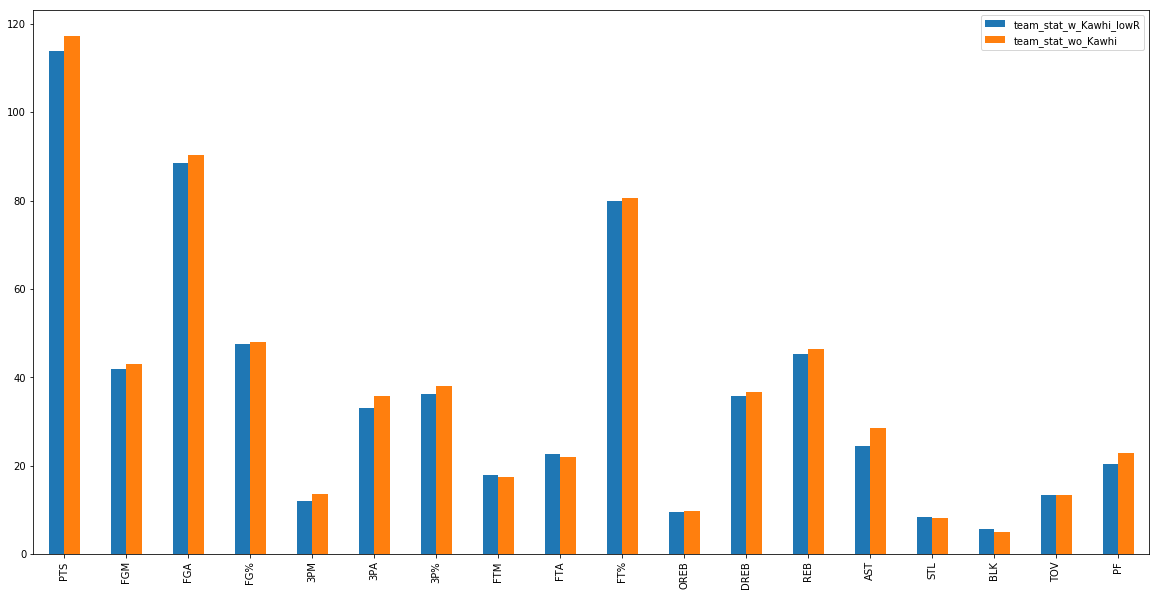

In [26]:
res_revised.plot.bar(figsize=(20,10));

Apparently, the result is almost the same to the previous one. With Kwahi, Raptors get more steals and blocks. While without Kwahi, Raptors get more points, rebounds and assits, better FG%, 3P% as well as FT%(Surprise! It's different with the previous result. FT% with Kwahi played is higher than that only with low winning rate teams. It means Kwahi has a better FT% when playing against the champion competitors such as Bucks, Warriors, Nuggets, Rockets,Trail Blazers and 76ers, which are the top3 team in each conference with win% higher than 62%. What a big shot man!).

### Conclusion
In conclusion, from the above results, it seems that Raptors is still a very good team even without Kawhi. In the games wihtout Kawhi played, Raptors is a better team (increment: 3.2 points, 1.2 rebounds, 4.21 assists and 1.7% 3P% per game). They played more offensively and with more teamwork. On the other hand, with Klaw, Raptors is a better defensive team. So next season, Raptors will still be a competitor, at least for the regular season.

BTW, I didn't consider the Danny Green's influence to Raptors since he only miss two games in 2018-19 season, where Raptors got 2 Ws. I cannot argue that without Danny, Raptors' win% is 100% due to the lack of samples. Hopefully, OG Anunoby and Norman Powell can fill the gaps next season. Let's go, Raptors!

A Raptors fan